# Lab 6 - Optical Spectroscopy

## Jimmy Lechtner - jameslec

In [2]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(12.0, 9.0)) # This line changes the default figure size to be 12x9

After downloading the data:

1. Average the bias <br>
2. Subtract bias off all other things <br>
3. Average the corrected backgrounds <br>
4. Subtract the average of the backgrounds from the observations <br>
5. Average the observations (of each situation)

In [3]:
path = "lab6_data/"

bias = []
for i in range(45,55):
    zeros = (8-len(str(i)))*'0'
    bias.append(fits.getdata(path+'nov_7Bias'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))

dark = []
for i in range(66,69):
    zeros = (8-len(str(i)))*'0'
    dark.append(fits.getdata(path+'nov_7Dark'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))

rest = []
for i in range(55, 66):
    zeros = (8-len(str(i)))*'0'
    rest.append(fits.getdata(path+'nov_7'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))

background = [rest[0], rest[1], rest[2]]
neon = [rest[3], rest[4], rest[5]]
helium = [rest[6], rest[7]]
sky = [rest[8], rest[9], rest[10]]


bias_mean = np.mean(bias, axis=0)

background = [johnny - bias_mean for johnny in background]
neon = [johnny - bias_mean for johnny in neon]
helium = [johnny - bias_mean for johnny in helium]
sky = [johnny - bias_mean for johnny in sky]
dark = [johnny - bias_mean for johnny in dark]


back_mean = np.mean(background, axis=0)

neon = [tohmmy - back_mean for tohmmy in neon]
helium = [tohmmy - back_mean for tohmmy in helium]
sky = [tohmmy - back_mean for tohmmy in sky]
dark = [tohmmy - back_mean for tohmmy in dark]

avg_neon = np.mean(neon, axis=0)
avg_helium = np.mean(helium, axis=0)
avg_sky = np.mean(sky, axis=0)
avg_dark = np.mean(dark, axis=0)

## Neon

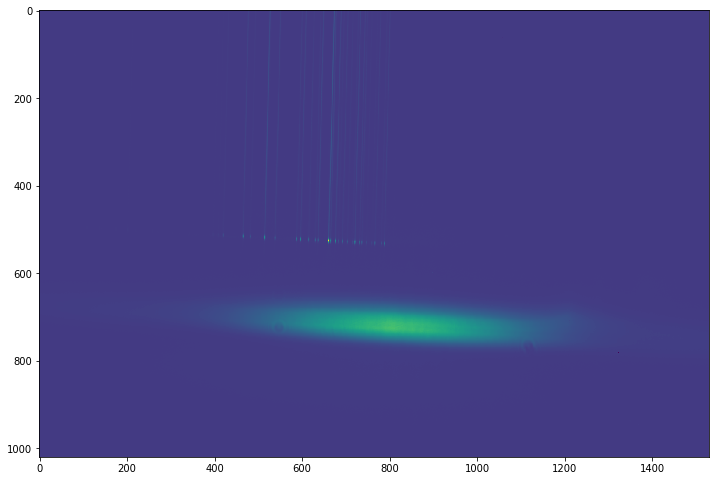

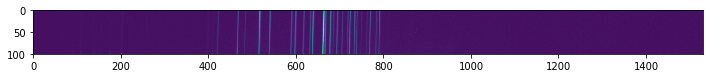

In [4]:
plt.imshow(avg_neon)
plt.show()

#Now we use array indexing to examine a chosen part of the spectrum to see if it contains the data we need (i.e., spectral lines).
plt.imshow(avg_neon[400:500,:])

## Helium

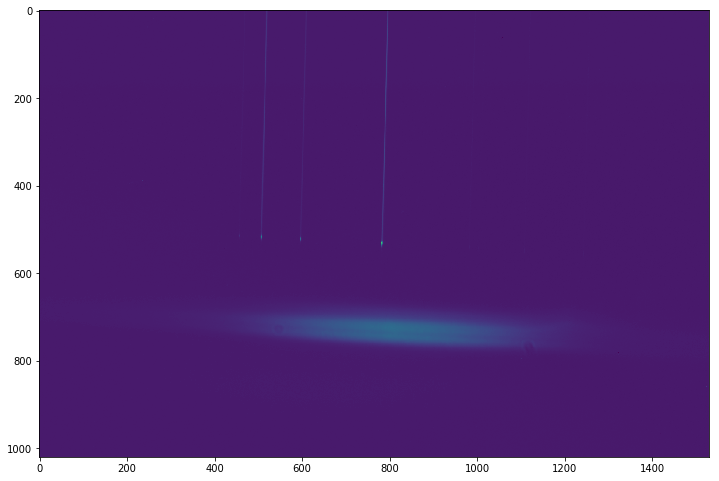

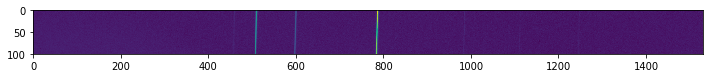

In [5]:
plt.imshow(avg_helium)
plt.show()

#Now we use array indexing to examine a chosen part of the spectrum to see if it contains the data we need (i.e., spectral lines).
plt.imshow(avg_helium[400:500,:])

## Sky

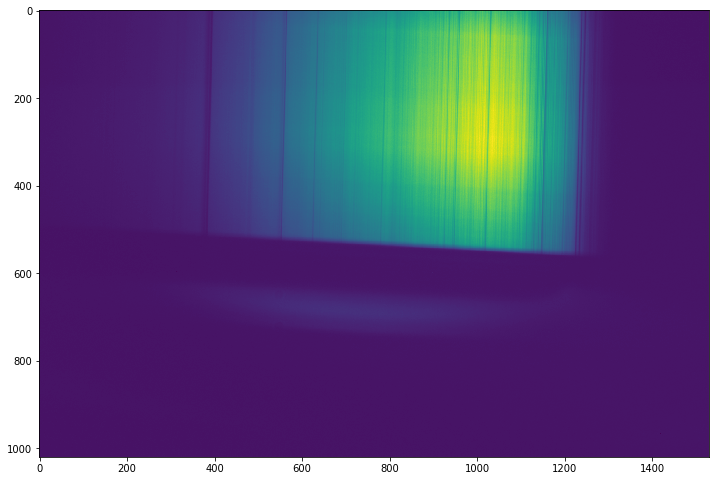

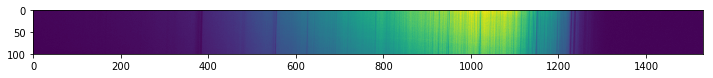

In [6]:
sun = avg_sky - avg_dark
plt.imshow(sun)
plt.show()

#Now we use array indexing to examine a chosen part of the spectrum to see if it contains the data we need (i.e., spectral lines).
plt.imshow(sun[400:500,:])

-----------------------------------------------------------------------------------------------------------

## Helium Calibration

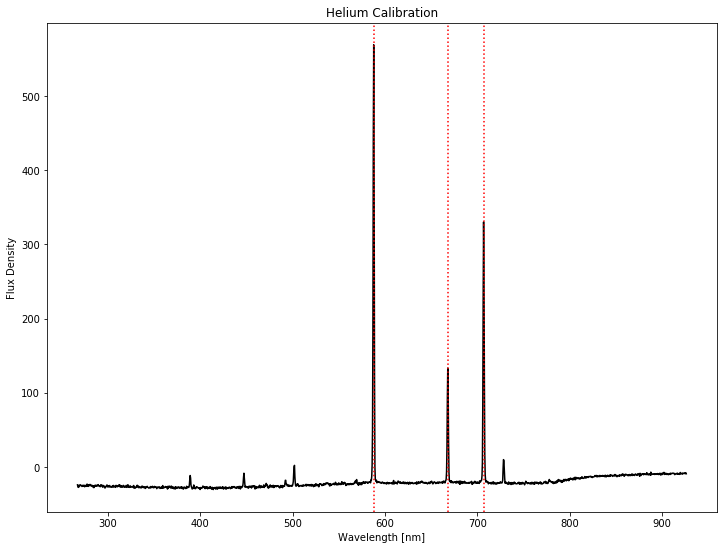

In [42]:
lamp_good = np.asarray(avg_helium[400:500,:]).mean(axis=0) # Switch sun[] to neon or helium to get the graphs of those sprectrums

sun_good  = np.asarray(sun[400:500,:]).mean(axis=0)

example_lines = [587.562, 706.519, 667.815] # Wavelengths (nm) of [1st, 2nd, and 3rd] largest peaks respectively

x = (np.flip(np.arange(len(lamp_good)),0) * .431) + 267
y = lamp_good
plt.plot(x, y, 'k-') #np.flip(~~~) reverses the array inside it.
for line in example_lines:
    plt.axvline(line,linestyle=":",color='r')
plt.title("Helium Calibration")
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux Density')
plt.show()

## Neon Calibration

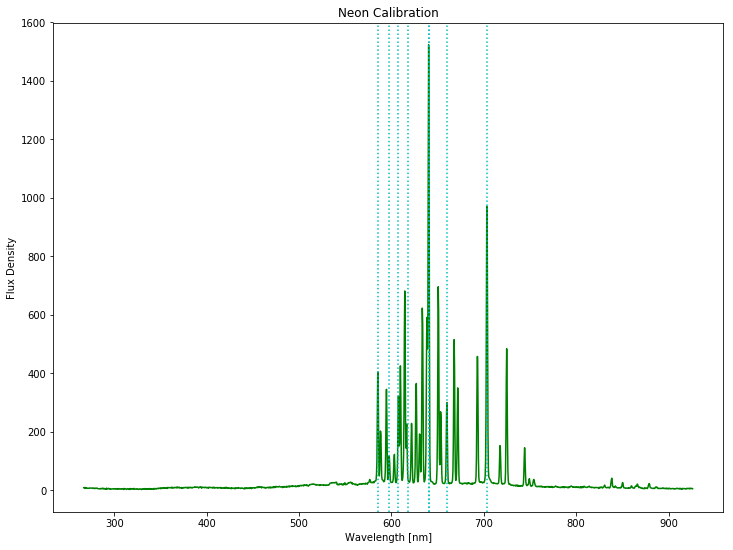

In [43]:
lamp_good = np.asarray(avg_neon[400:500,:]).mean(axis=0) # Switch sun[] to neon or helium to get the graphs of those sprectrums

sun_good  = np.asarray(sun[400:500,:]).mean(axis=0)

example_lines = [585.249, 618.215, 640.225, 703.241, 607.434, 597.553, 659.895, 640.225] # some peaks from the neon.txt

x = (np.flip(np.arange(len(lamp_good)),0) * .431) + 267
y = lamp_good
plt.plot(x, y, 'g') #np.flip(~~~) reverses the array inside it.
for line in example_lines:
    plt.axvline(line,linestyle=":",color='c')
plt.title("Neon Calibration")
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux Density')
plt.show()

## Notes:

Use helium to find your way, but then use neon for the actual wavelength calibration

## Solar Spectrum Analysis

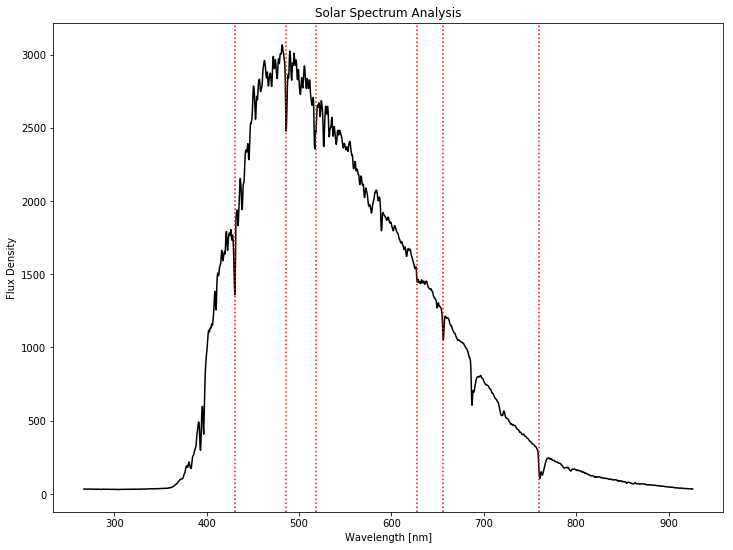

In [44]:
lamp_good = np.asarray(sun[400:500,:]).mean(axis=0) # Switch sun[] to neon or helium to get the graphs of those sprectrums

sun_good  = np.asarray(sun[400:500,:]).mean(axis=0)

example_lines = [430.790, 486.134, 518.362, 627.661, 656.281, 759.370] # Frauhofer Lines: [G,F,b1,a,C,A]

x = (np.flip(np.arange(len(lamp_good)),0) * .431) + 267
y = lamp_good
plt.plot(x, y, 'k-')
for line in example_lines:
    plt.axvline(line,linestyle=":",color='r')
plt.title("Solar Spectrum Analysis")
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux Density')
plt.show()

In [21]:
# Code to identify the dips in my spectrum to compare with known values
for i in range(1, len(x)-1):
    if y[i-1] > y[i] and y[i] < y[i+1]:
        print(i, x[i], y[i]) # (index, wavelength, flux)

# [G,430.790]    [F,486.134]    [b,518.362]   [a,627.661]   [C,656.281]   [A,759.370]
# [1150,430.349] [1021,485.948] [946,518.273] [691,628.178] [626,656.193] [384,760.495]

(2, 925.13699999999994, 33.550000000000011)
(4, 924.27499999999998, 33.946666666666658)
(9, 922.12, 35.299999999999997)
(11, 921.25800000000004, 35.673333333333339)
(14, 919.96500000000003, 36.186666666666653)
(17, 918.67200000000003, 36.663333333333327)
(19, 917.80999999999995, 36.553333333333342)
(27, 914.36199999999997, 37.776666666666664)
(29, 913.5, 38.916666666666686)
(32, 912.20699999999999, 40.293333333333337)
(34, 911.34500000000003, 40.046666666666667)
(36, 910.48299999999995, 40.04000000000002)
(43, 907.46600000000001, 41.786666666666676)
(46, 906.173, 43.45333333333334)
(53, 903.15599999999995, 45.953333333333312)
(55, 902.29399999999998, 46.193333333333349)
(58, 901.00099999999998, 46.213333333333331)
(61, 899.70799999999997, 47.976666666666659)
(63, 898.846, 48.050000000000011)
(68, 896.69100000000003, 49.740000000000009)
(73, 894.53599999999994, 52.759999999999991)
(76, 893.24299999999994, 52.956666666666678)
(79, 891.95000000000005, 52.356666666666676)
(85, 889.36400000